# Exploratory Data Analysis

In [1]:
# load the libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder

In [2]:
# read data
rawdf = pd.read_csv("../VI_train.csv")
test  = pd.read_csv("../VI_test.csv")

In [3]:
#see the head of data
rawdf.head()

,Unnamed: 0,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## 整型的单变量分析

In [4]:
def UVA_numeric(data, var_group):

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  for j,i in enumerate(var_group):
    
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    points = mean-st_dev, mean+st_dev

    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

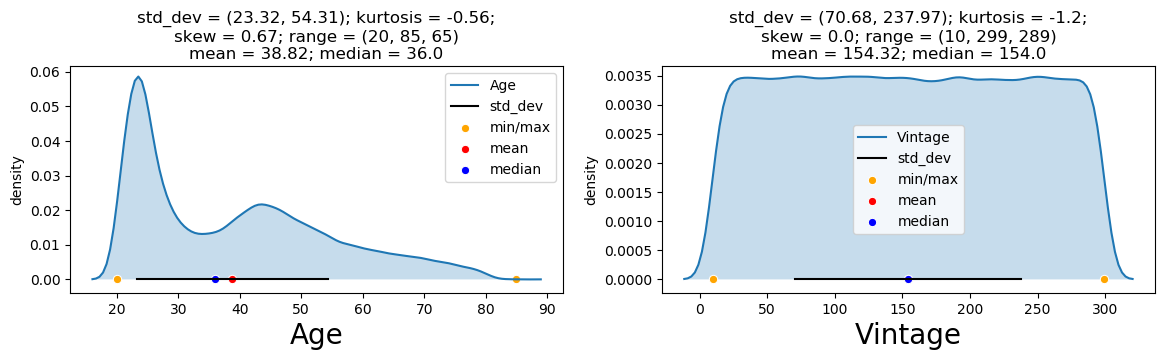

In [5]:
customer_details = ["Age","Vintage"]
UVA_numeric(rawdf,customer_details)

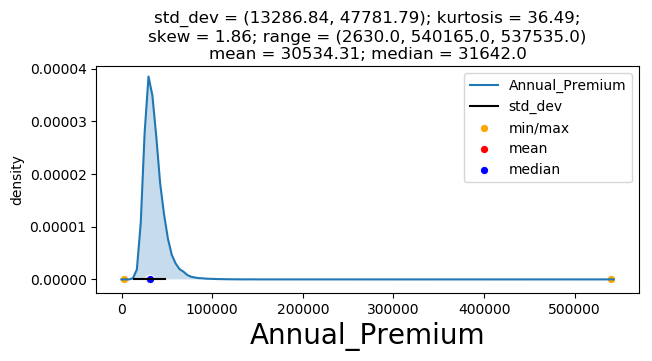

In [6]:
UVA_numeric(rawdf,["Annual_Premium"])


## 类别信息分析

In [9]:
# 以下特征都属于分类信息
rawdf["Driving_License"] = rawdf["Driving_License"].astype("category") 
rawdf["Previously_Insured"] = rawdf["Previously_Insured"].astype("category") 
rawdf["Driving_License"] = rawdf["Driving_License"].astype("category") 
rawdf["Response"] = rawdf["Response"].astype("category")
rawdf["Region_Code"] = rawdf["Region_Code"].astype("category")
rawdf["Policy_Sales_Channel"] = rawdf["Policy_Sales_Channel"].astype("category")
rawdf["Gender"] = rawdf["Gender"].astype("category")
rawdf["Vehicle_Age"] = rawdf["Vehicle_Age"].astype("category")
rawdf["Vehicle_Damage"] = rawdf["Vehicle_Damage"].astype("category")

In [10]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # 设置图大小
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # 对于每个特征
  for j,i in enumerate(var_group):
    n_uni = data[i].nunique()
    if n_uni > 20:
        norm_count1 = data[i].value_counts(normalize = True)
        norm_count = norm_count1.sort_values().tail(20) 
    else:
        norm_count = data[i].value_counts(normalize = True)
    

   # 画出对应特点
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

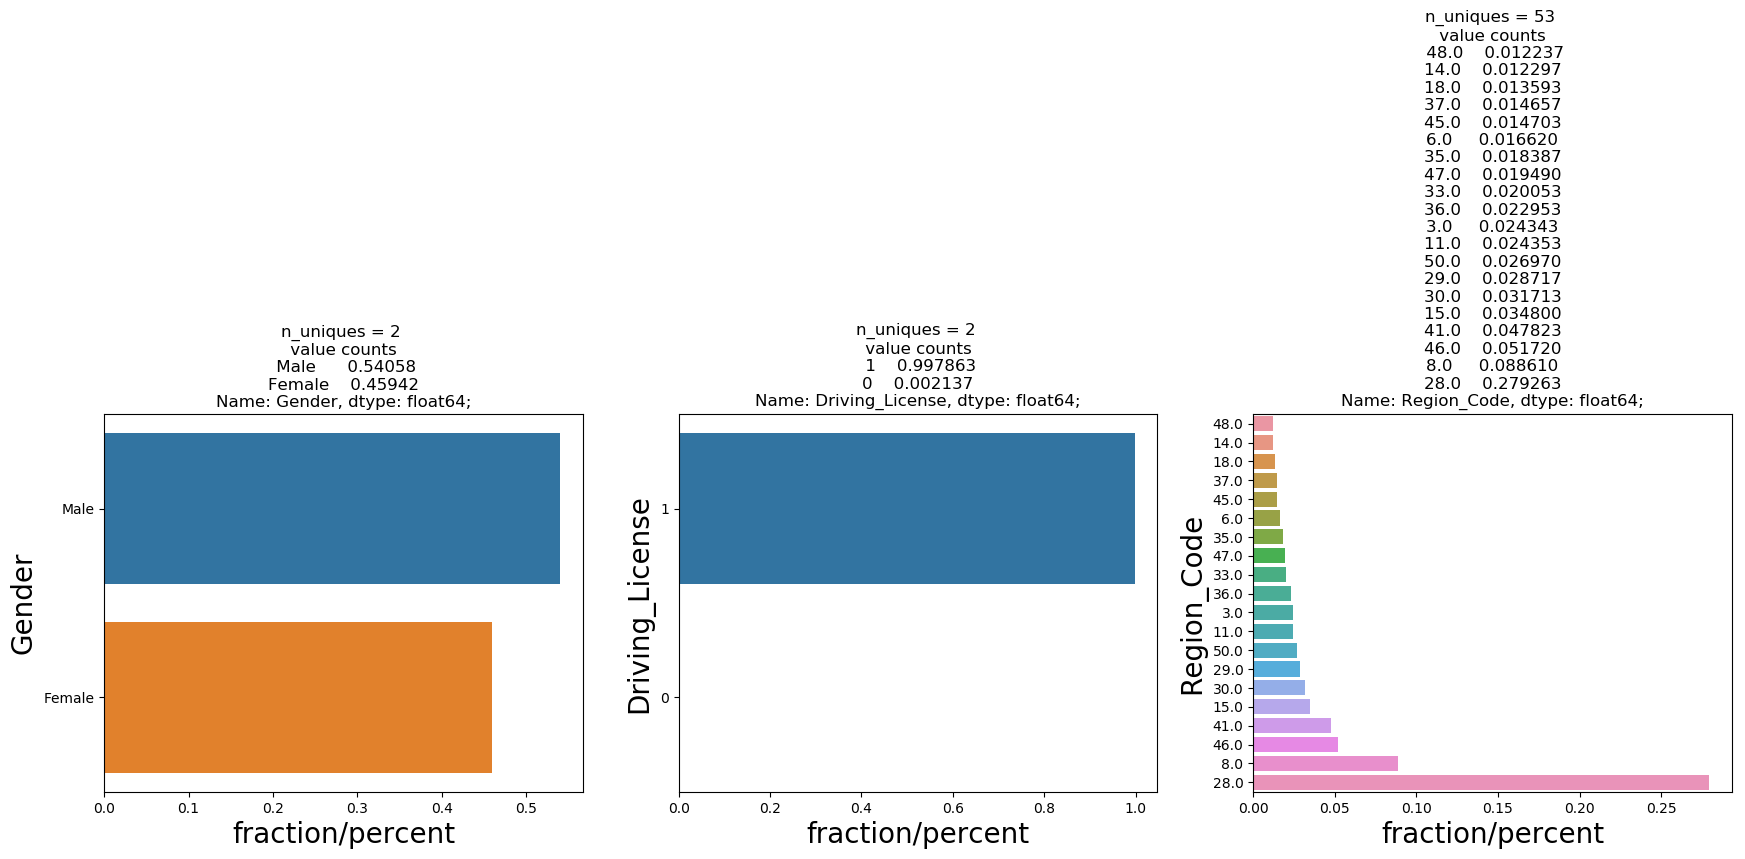

In [11]:
UVA_category(rawdf,["Gender","Driving_License","Region_Code"])

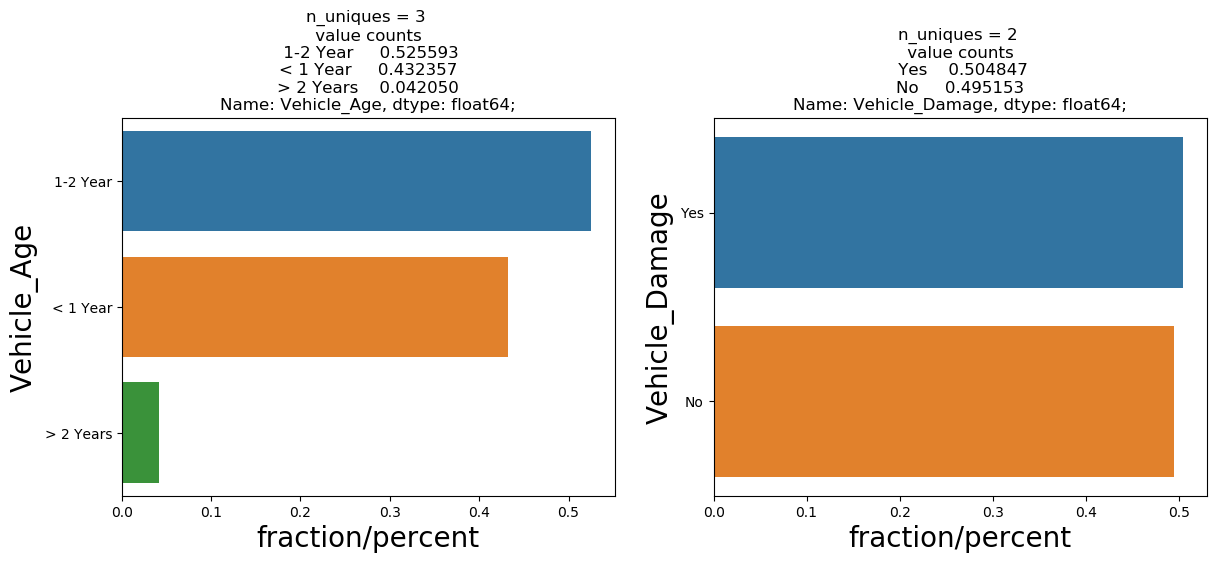

In [12]:
UVA_category(rawdf,["Vehicle_Age","Vehicle_Damage"])

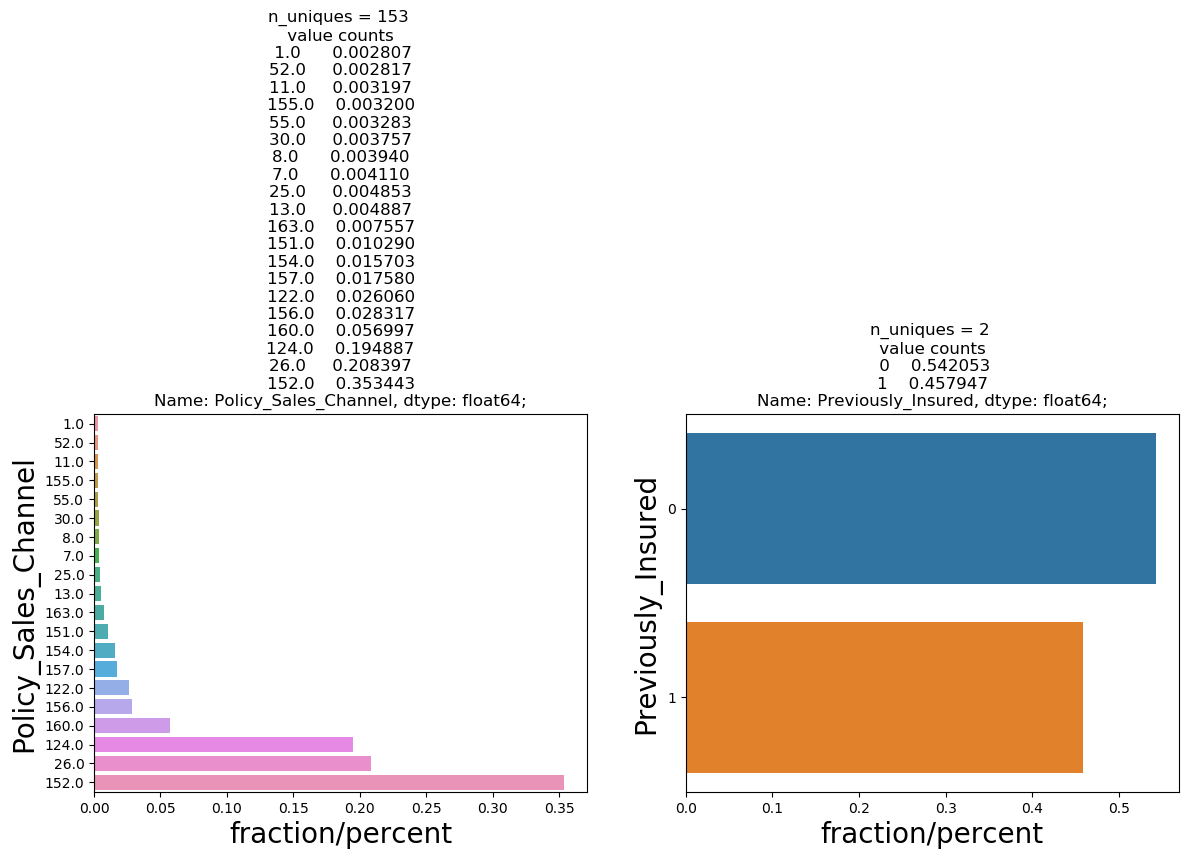

In [13]:
UVA_category(rawdf,["Policy_Sales_Channel","Previously_Insured"])

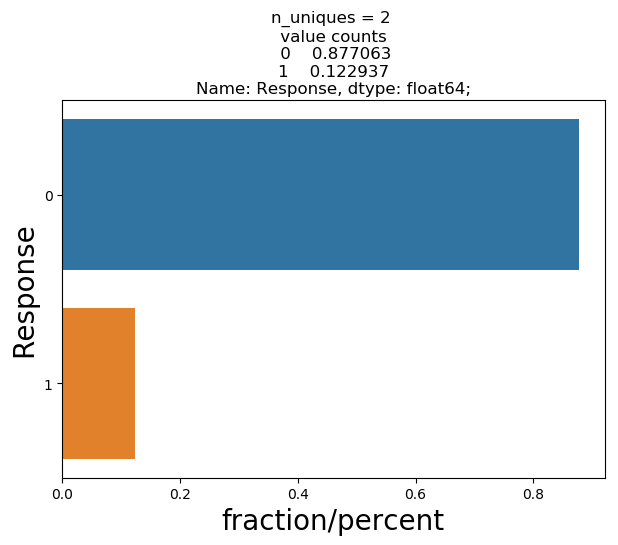

In [14]:
UVA_category(rawdf,["Response"])

In [47]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  Z检验函数
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma

  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [48]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  T检验函数
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [49]:
def Bivariate_cont_cat(data, cont, cat, category):
  
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #计算p值
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  
  plt.figure(figsize = (15,6), dpi=140)
  
  
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  

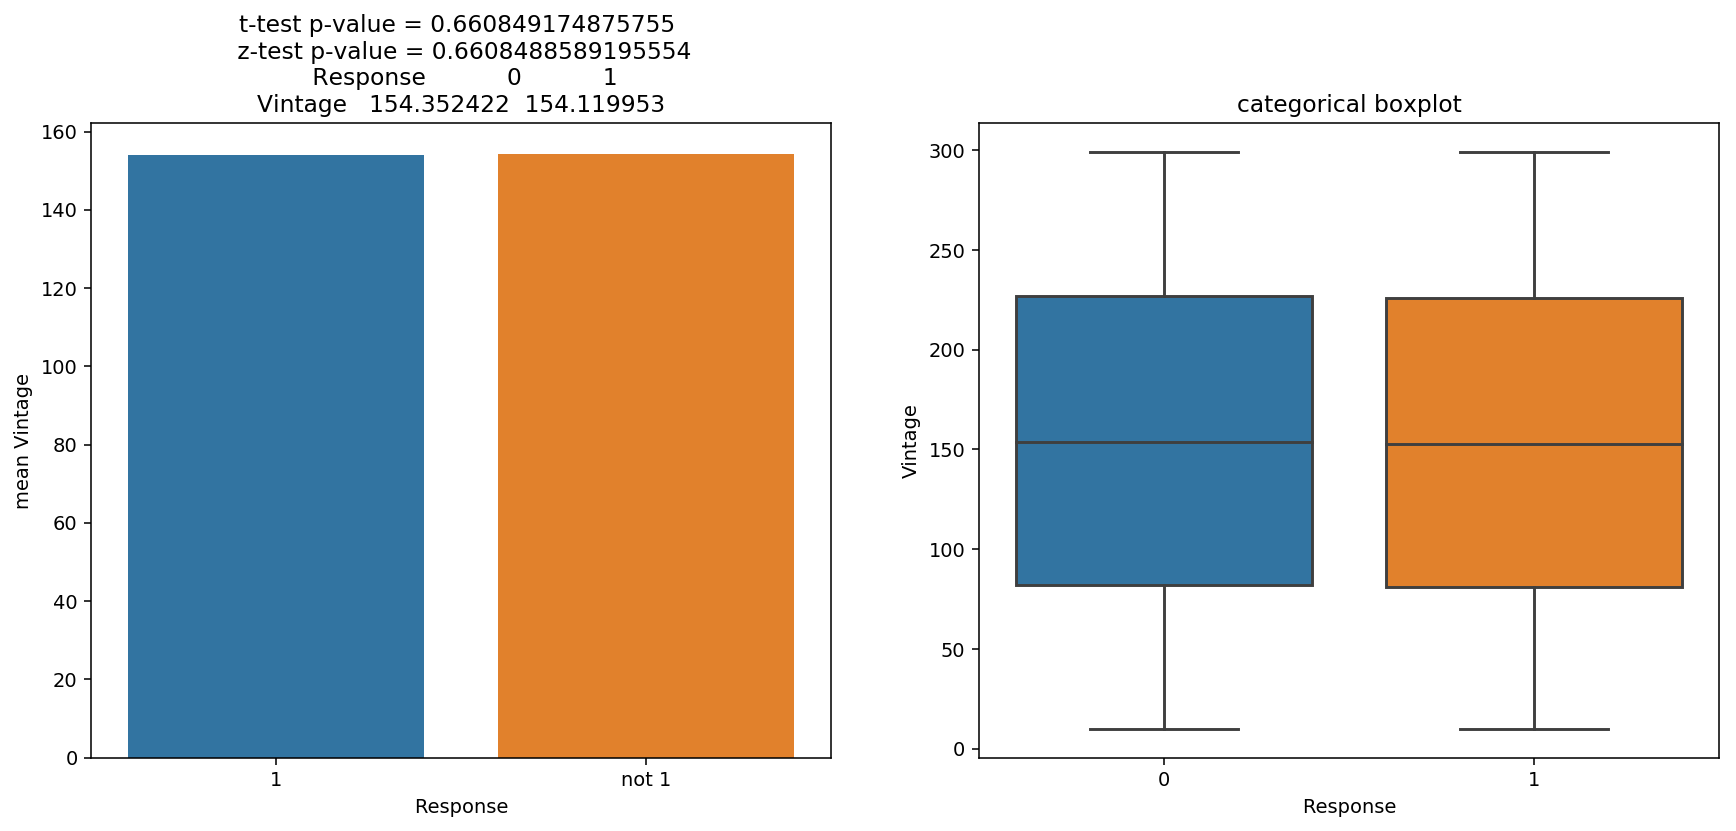

In [50]:
Bivariate_cont_cat(rawdf, 'Vintage', 'Response', 1)

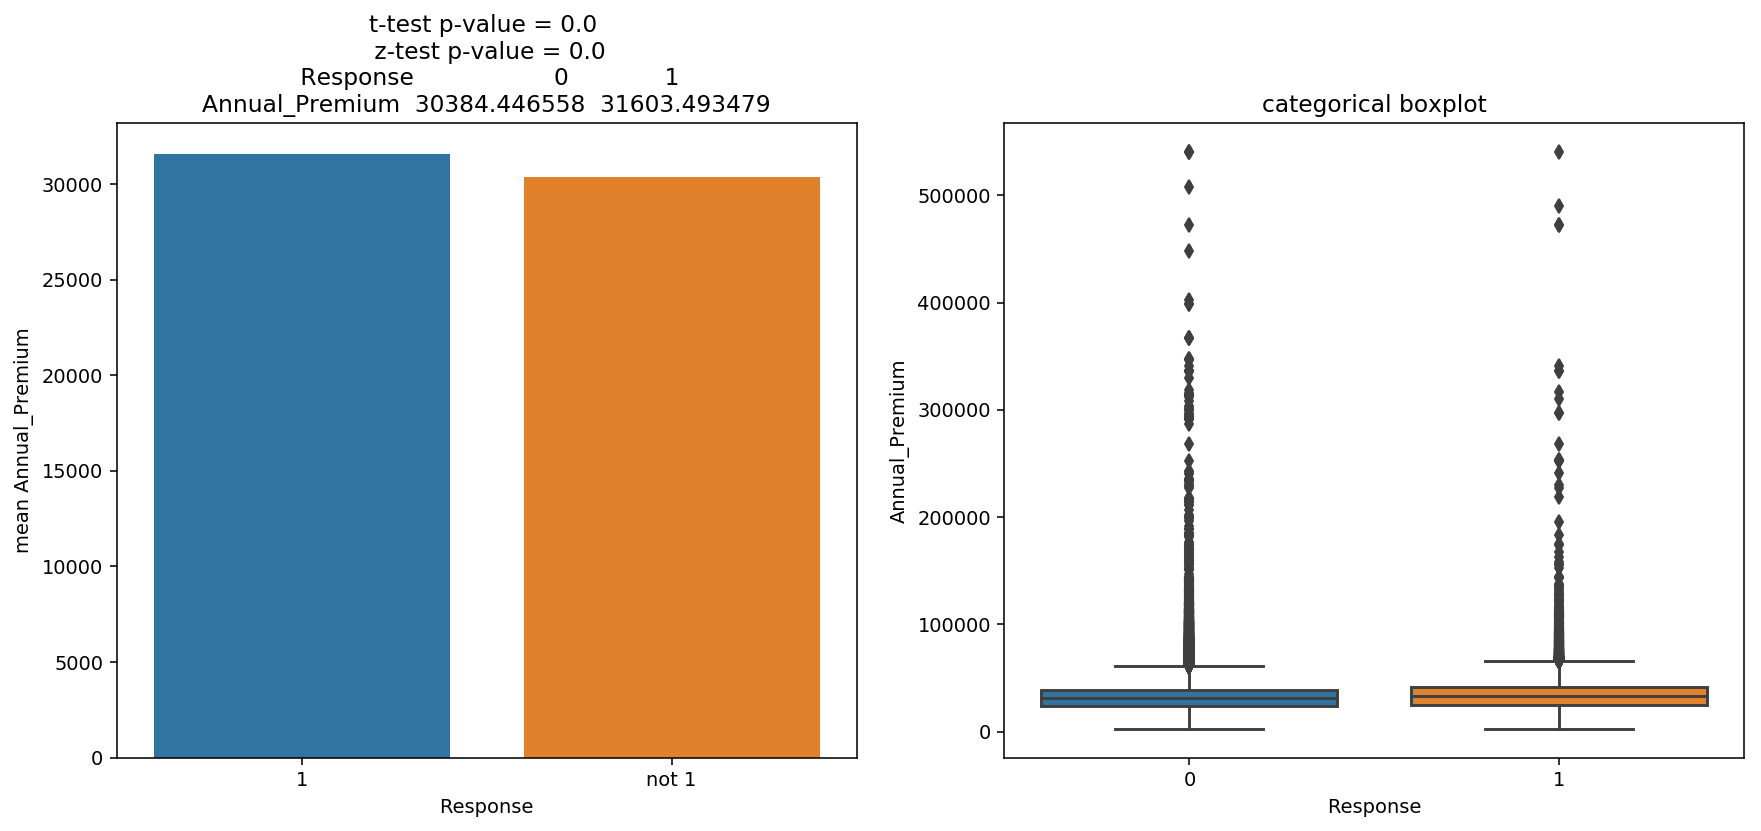

In [51]:
Bivariate_cont_cat(rawdf, 'Annual_Premium', 'Response', 1)


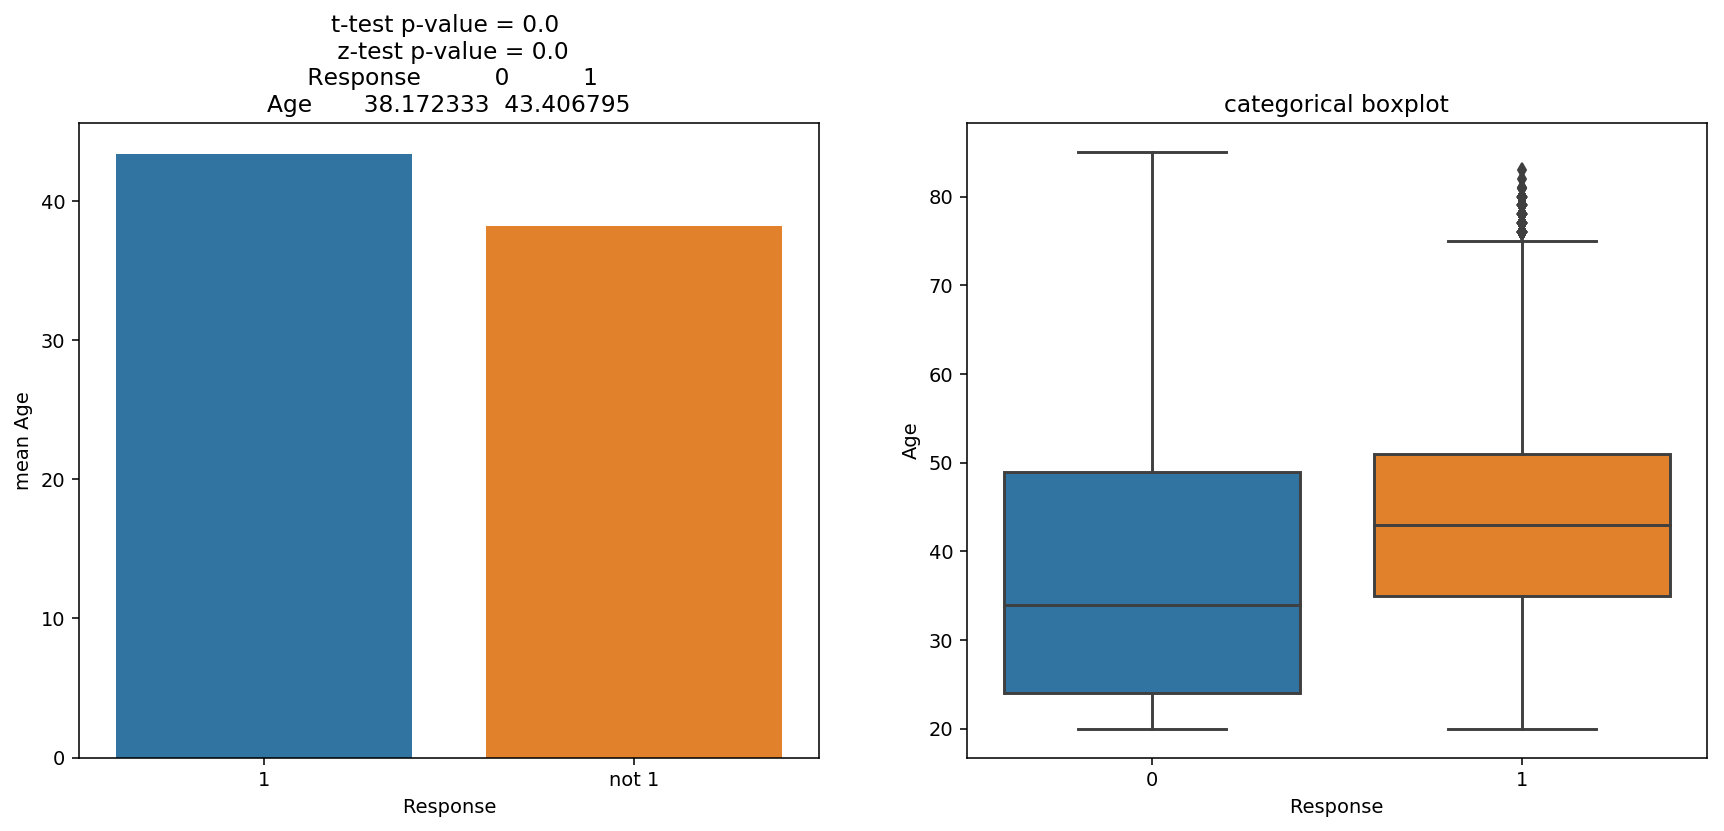

In [52]:
Bivariate_cont_cat(rawdf, 'Age', 'Response', 1)


In [64]:
def BVA_categorical_plot(data, tar, cat):
  '''
  '''
  data = data[[cat,tar]][:]


  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  if p<0.05:
    sig = True
  else:
    sig = False

  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

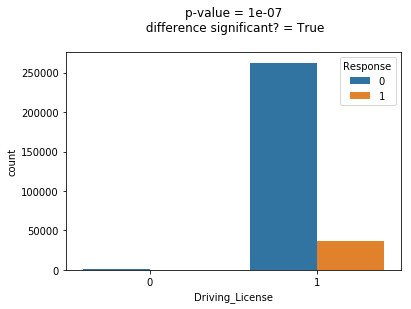

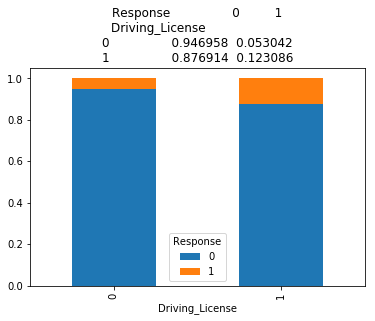

In [65]:
BVA_categorical_plot(rawdf, "Response","Driving_License")

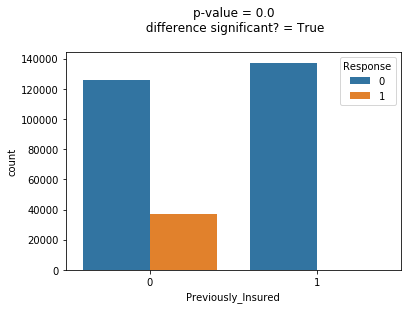

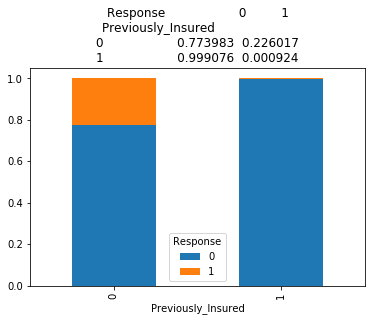

In [66]:
BVA_categorical_plot(rawdf, "Response","Previously_Insured")

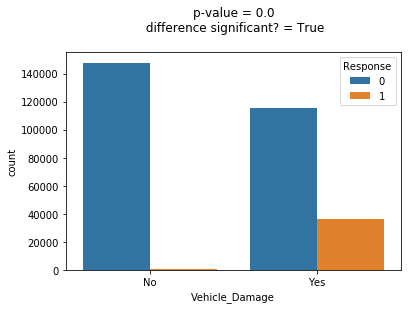

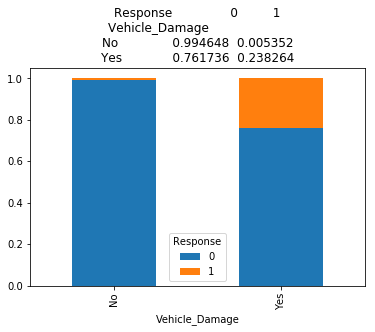

In [67]:
BVA_categorical_plot(rawdf, "Response","Vehicle_Damage")

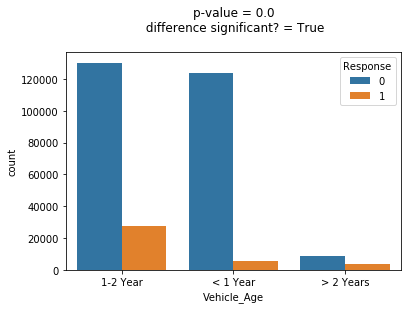

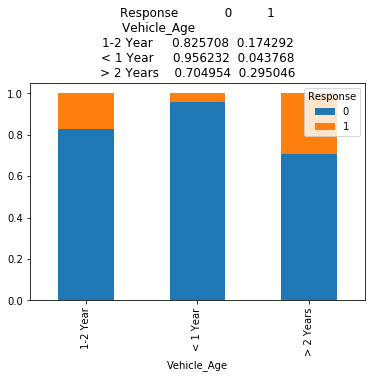

In [68]:
BVA_categorical_plot(rawdf, "Response","Vehicle_Age")

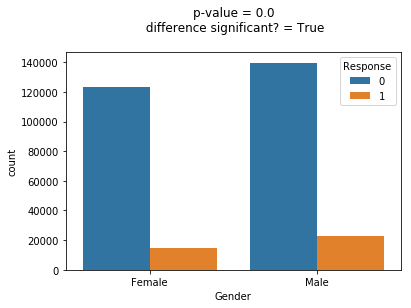

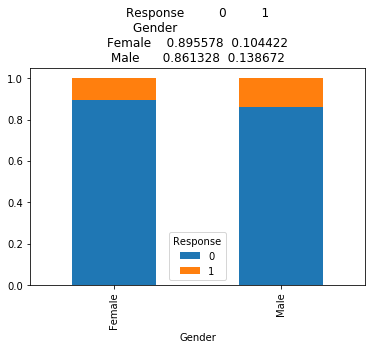

In [69]:
BVA_categorical_plot(rawdf, "Response","Gender")